In [1]:
#Author: Gabriel Campos

#Bibliotecas
import seaborn as sn
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
import pandas as pd
#import scipy
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("Scikit-learn: ", sk.__version__, "pandas:", pd.__version__, "numpy:", np.__version__)

Scikit-learn:  1.0.2 pandas: 1.3.5 numpy: 1.21.6


In [2]:
from google.colab import files
files.upload()

Saving fruit_data_with_colors.txt to fruit_data_with_colors.txt


{'fruit_data_with_colors.txt': b'fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score\r\n1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55\r\n1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59\r\n1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60\r\n2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80\r\n2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79\r\n2\tmandarin\tmandarin\t80 \t5.8\t4.3\t0.77\r\n2\tmandarin\tmandarin\t80 \t5.9 \t4.3\t0.81\r\n2\tmandarin\tmandarin\t76\t5.8\t4.0\t0.81\r\n1\tapple\tbraeburn\t178\t7.1\t7.8\t0.92\r\n1\tapple\tbraeburn\t172\t7.4\t7.0\t0.89\r\n1\tapple\tbraeburn\t166\t6.9\t7.3\t0.93\r\n1\tapple\tbraeburn\t172\t7.1\t7.6\t0.92\r\n1\tapple\tbraeburn\t154\t7.0\t7.1\t0.88\r\n1\tapple\tgolden_delicious\t164\t7.3\t7.7\t0.70\r\n1\tapple\tgolden_delicious\t152\t7.6\t7.3\t0.69\r\n1\tapple\tgolden_delicious\t156\t7.7\t7.1\t0.69\r\n1\tapple\tgolden_delicious\t156\t7.6\t7.5\t0.67\r\n1\tapple\tgolden_delicious\t168\t7.5\t7.6\t0.73\r\n1\tapple\tcripps_pink\t162\t7.5\t7.1\t0.83\r\n1\ta

In [4]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [5]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

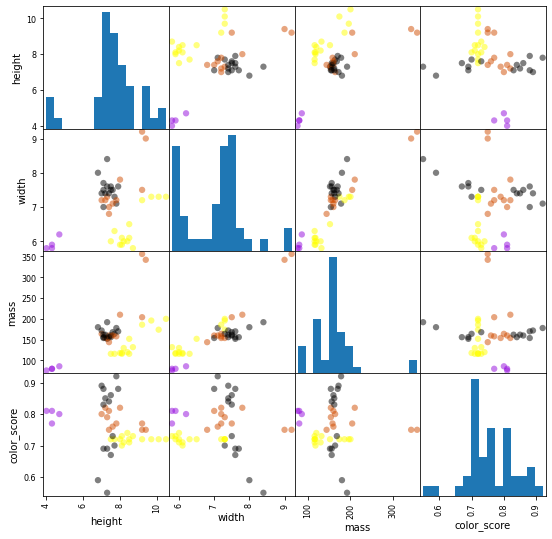

In [6]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

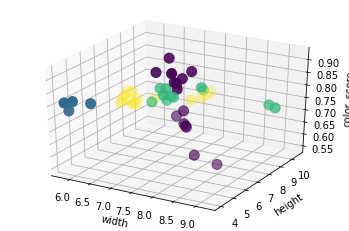

In [7]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [8]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [9]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [10]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
##KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [12]:
knn.fit(X_train, y_train) #treinar o classificador

KNeighborsClassifier()

In [13]:
knn.score(X_test, y_test) #Acurácia do teste
#Acurácia é Dentre todas as classificações, quantas o modelo classificou corretamente
#(VP + VN)/(VP+VN+FP+FN)

0.5333333333333333

In [14]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [15]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [16]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

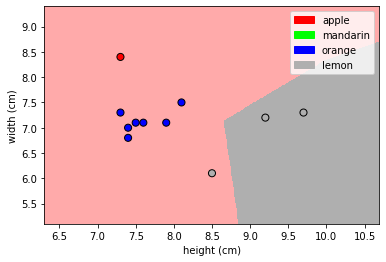

In [22]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

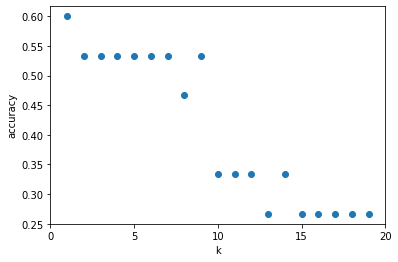

In [18]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

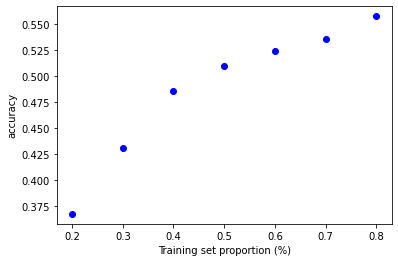

In [19]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [20]:
X_train.size

33

In [21]:
X_test.size

144